In [1]:
!pip install opencv-python

In [2]:
import cv2
from keras.models import load_model
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt

In [3]:
model = load_model('keras_model.h5')

In [4]:
def modelP(imgArea):
    
    data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
    image = Image.open(imgArea)
    size = (224, 224)
    image = ImageOps.fit(image, size, Image.ANTIALIAS)
    image_array = np.asarray(image)
    normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
    data[0] = normalized_image_array
    prediction = model.predict(data)
    class_name=['male','female']
    txt=class_name[np.argmax(prediction)] + '==> male:' + str(prediction[0][0]*100) + ' female: ' + str(prediction[0][1]*100)
    
    return txt

In [5]:
aaa=[]


#haarcascades 불러오기
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')


#이미지 불러오기
img = cv2.imread('two.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


#얼굴 찾기
faces = face_cascade.detectMultiScale(gray, 1.3, 5)


#font
blue = (255, 0, 0)
green= (0, 255, 0)
red= (0, 0, 255)
white= (255, 255, 255)
font = cv2.FONT_HERSHEY_PLAIN

#count
result = 0 

for (x, y, w, h) in faces:
    
    result += 1
    cv2.rectangle(img, (x-20, y-20), (x + w+20, y + h+20), (255, 0, 0), 2)
    img = cv2.putText(img, str(result), (x-20, y-30), font, 1, blue, 1, cv2.LINE_AA)
    
    roi_color = img[y-20:y + h+20, x-20:x + w+20]
    cv2.imwrite('face_result\\'+str(result)+'.jpg',roi_color)
    pre=modelP('face_result\\'+str(result)+'.jpg')
    aaa.append(pre)
    #print(aaa)

    
print(aaa)
cv2.imshow('image', img)
key = cv2.waitKey(0)
cv2.destroyAllWindows()


C:\Users\HP\AppData\Local\Temp\ipykernel_11624\2590451061.py:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  image = ImageOps.fit(image, size, Image.ANTIALIAS)


1/1 [==============================] - 0s 17ms/step
['female==> male:11.038060486316681 female: 88.96193504333496', 'female==> male:22.380810976028442 female: 77.61918306350708', 'male==> male:79.49475646018982 female: 20.50524204969406', 'male==> male:82.01141357421875 female: 17.988581955432892', 'male==> male:78.64617705345154 female: 21.353821456432343', 'male==> male:81.62813782691956 female: 18.371857702732086', 'female==> male:7.153774797916412 female: 92.84622073173523', 'male==> male:55.4760217666626 female: 44.52398121356964', 'female==> male:24.966873228549957 female: 75.03312230110168']


total count => male:5 female:4


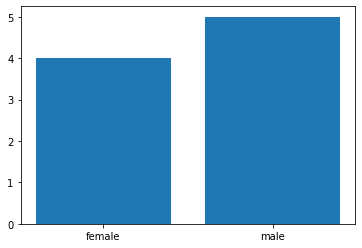

In [7]:
gubun=[i.split('==>')[0] for i in aaa]
re=np.unique(gubun, return_counts=True)
plt.bar(re[0],re[1])
txt='total count => male:' + str(re[1][1]) + ' female:'+str(re[1][0])
print(txt)

In [8]:
img = cv2.imread('two.jpg')
# 폰트 색상 지정


blue = (255, 0, 0)
green= (0, 255, 0)
red= (0, 0, 255)
white= (255, 255, 255)
font = cv2.FONT_HERSHEY_PLAIN
img = cv2.putText(img, txt, (10, 30), font, 2, blue, 1, cv2.LINE_AA)

for (x, y, w, h),result in zip(faces,aaa):
    
    cv2.rectangle(img, (x-20, y-20), (x + w+20, y + h+20), (255, 0, 0), 2)
    img = cv2.putText(img, result, (x, y-30), font, 1, blue, 1, cv2.LINE_AA)
    
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
